# Graphs
* set of vertices and edges
* G = (V, E)
* E $\subset$ V x V
* e = (u, v), vertex $u$ is source and vertex $v$ is its sink.
* A path is a directed graph from $u$ to vertex $v$. path $<v_0, v_1, \dots, v_{n-1} >$ of length $n-1$.
Here, $u = v_0$ and $v = v_{n-1}$
* If there exists a path from $u$ to $v$, $v$ is said to be reachable from $u$.

Example:

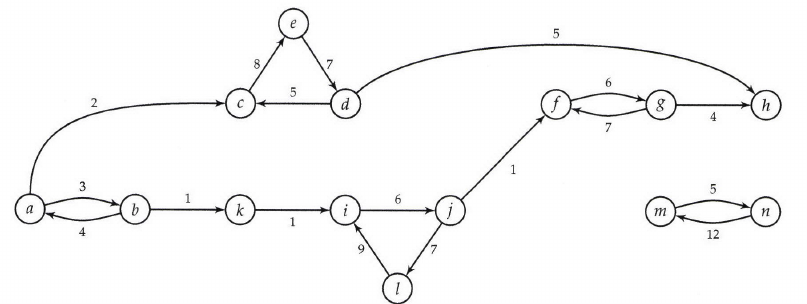

* In this graph, the sequence $<a, c, e, d, h>$ is a path in the graph.

### DAG
Directed Acyclic Graph is a directed garph with no cycles.
* vertices with no incoming edges are known as **sources**.
* vertices with no outgoing edges are known as **sinks**.
* **Topological Ordering:** an ordering of vertices in which each edge is from a vertex earlier in the ordering to a vertex later in the ordering.

### Undirected Graph
* G is an undirected graph, vertices u and v is said to be connected if G contains a path from u to v.
* **Connected Component:** maximal set of vertices C such that each pair of vertices in C is connected in G.


### Representation
* **Adjacency List**
* **Adjacency Matrix**

NOTE: Trees are also a special type of graph.

# Graphs Boot Camp


Q. Suppose you were given a list of the outcomes of matches between pairs of teams with each outcome being a win or loss. Given teams A and B, is there a sequence of teams starting with A and ending with B such that each team in sequence has beaten the next team in the sequence?

In [1]:
from collections import defaultdict, namedtuple
MatchResult = namedtuple('MatchResult', ('winning_team', 'losing_team'))
def can_team_a_beat_team_b(matches, team_a, team_b):
    def build_graph():
        graph = defaultdict(set)
        for match in matches:
            graph[match.winning_team].add(match.losing_team)
        return graph
    
    def is_reachable_dfs(graph, curr, dest, visited=set()):
        if curr == dest:
            return True
        elif curr in visited or curr not in graph:
            return False
        visited.add(curr)
        return any(is_reachable_dfs(graph, team, dest) for team in graph[curr])
    return is_reachable_dfs(build_graph(), team_a, team_b)

# Graph Search

Given a 2D array of black and white entries representing a maze with a designated entrance and exit, if one exists.

In [2]:
def dfs(maze, start, end):
    n, m = len(maze), len(maze[0])
    path = []
    def helper(curr):
        cr, cc = curr
        if not(0 <= cr < n and 0 <= cc < m) or maze[cr][cc] == 0:
            return False
        
        maze[cr][cc] = 0
        path.append(curr)
        if curr == end:
            return True
        
        # if path is there
        nxtCells = ((cr+1, cc), (cr-1,cc), (cr, cc+1), (cr, cc-1))
        if any(helper(nxtCell) for nxtCell in nxtCells):
            return True
        
        # if path is not there
        path.pop()
        return False
    helper(start)
    return path
maze = [
    [0,1,1,1],
    [1,1,0,1],
    [0,1,1,1],
    [1,1,0,1]
]
dfs(maze, (3,1), (3,3))

[(3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]

# Paint a boolean matrix
Implement a routine that takes an n x m Boolean anay A together with an entry (x, y) and flips the color of the region associated with (x, y).

In [3]:
def flip_colors(A, start):
    n, m = len(A), len(A[0])
    init_color = A[start[0]][start[1]]
    to_color = init_color ^ 1
    
    def dfs(start):
        i, j = start
        adj_cells = ((i+1, j),(i-1, j),(i, j+1),(i, j-1))
        if not (0 <= i < n and 0 <= j < m) or A[i][j] != init_color:
            return False
        A[i][j] = to_color
        for cell in adj_cells:
            dfs(cell)
    
    dfs(start)
maze = [
    [0,1,1,1],
    [1,0,0,1],
    [0,1,1,0],
    [1,1,1,1]
]

flip_colors(maze, (3,0))
maze

[[0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]]

In [4]:
def floodFill(image, sr, sc, color):
    n, m = len(image), len(image[0])
    init_color = image[sr][sc]
    def dfs(r, c):
        adj_cells = ((r+1, c),(r-1, c),(r, c-1),(r, c+1))
        if not (0 <= r < n and 0 <= c < m) or image[r][c] != init_color:
            return False
        
        image[r][c] = color
        for x, y in adj_cells:
            dfs(x, y)
            
    dfs(sr, sc)
    
    return image

floodFill([[1,1,1],[1,1,0],[1,0,1]], 1, 1, 2)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

In [5]:
def floodFiller(image, sr, sc, color):
    n, m = len(image), len(image[0])
    init_color = image[sr][sc]
    stack = [(sr, sc)]
    visited = set()
    while stack:
        curx, cury = stack.pop()
        if not (0 <= curx < n and 0 <= cury < m) or image[curx][cury] != init_color or (curx, cury) not in visited:
            continue
        image[curx][cury] = color
        visited.add((curx, cury))
        stack += [(curx+1, cury),(curx, cury+1), (curx-1, cury), (curx, cury-1)]
    
    return image
# floodFiller([[1,1,1],[1,1,0],[1,0,1]], 1, 1, 2)
floodFiller([[0,0,0],[0,0,0],[0,0,0]], 0, 0, 0)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

# Compute Enclosed Regions
Let A be the 2D array whose entries are either W or B (0 or 1). Write a program that takes A and replaces all Ws that cannot reach the boundary with a B.

In [17]:
def enclosed_region(A):
    n, m = len(A), len(A[0])
    whites = set()
    
    # store all white cells
    for i in range(n):
        for j in range(m):
            if A[i][j] == 0:
                whites.add((i, j))
    
    # get edge whites
    edge_white = set()
    for i in range(n):
        if not A[i][0]: edge_white.add((i, 0))
        if not A[i][m-1]: edge_white.add((i, m-1))
    for j in range(m):
        if not A[0][j]: edge_white.add((0, j))
        if not A[n-1][j]: edge_white.add((n-1, j))
    
    # remove them from white set using dfs
    for white in edge_white:
        x, y = white
        stack = [(x, y)]
        visited = set()
        while stack:
            x, y = stack.pop()
            if not (0 <= x < n and 0 <= y < m and A[x][y] == 0 and (x,y) not in visited):
                continue
            if (x,y) in whites:
                whites.remove((x,y))
            visited.add((x,y))
            stack += [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
    
    # make remaining whites to 1
    for x, y in whites:
        A[x][y] = 1
    
    return A

A = [
    [1,1,1,1],
    [0,1,0,1],
    [1,0,0,1],
    [1,1,1,1]
]
enclosed_region(A)

[[1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]

In [18]:
A = [
    [1,1,0,0,1],
    [1,0,1,1,1],
    [1,0,0,1,0],
    [0,1,1,0,1]
]
enclosed_region(A)

[[1, 1, 0, 0, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 1]]

In [29]:
def enclosed_region(A):
    from collections import deque
    n, m = len(A), len(A[0])
    q = deque([(i, j) for k in range(n) for i, j in ((k, 0), (k, m-1))] +
            [(i, j) for k in range(m) for i, j in ((0, k), (n-1, k))])
    while q:
        x, y = q.popleft()
        if 0 <= x < n and 0 <= y < m and A[x][y] == 0:
            A[x][y] = 2
            q.extend([(x-1, y), (x+1, y), (x, y-1), (x, y+1)])
    A[:] = [[0 if i == 2 else 1 for i in row] for row in A]
A = [
    [1,1,0,0,1],
    [1,0,1,1,1],
    [1,0,0,1,0],
    [0,1,1,0,1]
]
enclosed_region(A)
A

[[1, 1, 0, 0, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 1]]